# 1. 라이브러리 불러오기

---

In [45]:
import platform

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings(action = 'ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

if platform.system() == "Windows":
    plt.rcParams["font.family"] = 'Malgun Gothic'
else:
    plt.rcParams["font.family"] = "AppleGothic"

# 2. 데이터 불러오기

---

## 2.1 경부선 VDS 설치 정보 data

In [46]:
data1 = pd.read_csv('data/경부선 VDS 설치정보(그룹).csv', encoding = 'CP949')
print('경부선 VDS 설치정보 행과 열의 개수 :', data1.shape)

경부선 VDS 설치정보 행과 열의 개수 : (833, 19)


In [47]:
print('삭제 전 경부선 VDS 설치정보 행과 열의 개수 :', data1.shape, '\n')

# 'Unnamed: 0' 변수와 GRS80 좌표를 WGS 좌표로 변환해주었으므로 'GRS80' 변수 삭제
data1 = data1.drop(['Unnamed: 0', 'GRS80_X좌표', 'GRS80_Y좌표'], axis = 1)
print('삭제 후 경부선 VDS 설치정보 행과 열의 개수 :', data1.shape)

삭제 전 경부선 VDS 설치정보 행과 열의 개수 : (833, 19) 

삭제 후 경부선 VDS 설치정보 행과 열의 개수 : (833, 16)


In [48]:
# 경부선에 총 833개의 VDS가 존재함을 확인
print(data1['VDS_ID'].value_counts().value_counts())

1    833
Name: VDS_ID, dtype: int64


In [49]:
# 총 833개의 VDS를 분기점을 기준으로 해서 35개의 그룹으로 나누어 주었다. 
print(np.sort(data1['group'].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35]


## 2.2 2주간의 VDS 지점 교통량 data

In [50]:
# 총 1016064의 관측치와 15개의 변수로 이루어져 있다.
data2 = pd.read_csv('./data/경부선 8월 데이터(2주).csv')
print('2주간 VDS 지점 교통량 행과 열의 개수 :', data2.shape)

2주간 VDS 지점 교통량 행과 열의 개수 : (1016064, 15)


In [51]:
print('2주간 VDS 지점 교통량 VDS 개수 :', len(set(data2['VDS_ID'])))

2주간 VDS 지점 교통량 VDS 개수 : 756


In [52]:
# 경부선 VDS 설치 정보 data에서는 VDS의 개수가 총 833개인데, 2주간 VDS 지점 교통량 data에서는 VDS의 개수가 총 756개이다.
data1_vds_list = data1['VDS_ID']
data2_vds_list = [vds for vds in set(data2['VDS_ID'])]

불포함VDS = []

for item in data1_vds_list:
    if item not in data2_vds_list:
        불포함VDS.append(item)

print('불포함 VDS 개수 :', len(불포함VDS), '\n')
print(불포함VDS)

불포함 VDS 개수 : 77 

['0010VDE13650', '0010VDE13651', '0010VDE21210', '0010VDE21310', '0010VDE21510', '0010VDE21610', '0010VDE22710', '0010VDE22720', '0010VDE23010', '0010VDE23020', '0010VDE23610', '0010VDE23620', '0010VDE25310', '0010VDE25320', '0010VDE25610', '0010VDE25810', '0010VDE26310', '0010VDE26311', '0010VDE27310', '0010VDE27320', '0010VDE27610', '0010VDE27710', '0010VDE27720', '0010VDE29010', '0010VDE29020', '0010VDE29310', '0010VDE29320', '0010VDE29610', '0010VDE29611', '0010VDE29620', '0010VDE30010', '0010VDE30110', '0010VDE30910', '0010VDE31010', '0010VDE31210', '0010VDE31220', '0010VDS13650', '0010VDS13651', '0010VDS21210', '0010VDS21310', '0010VDS21610', '0010VDS21620', '0010VDS22710', '0010VDS22720', '0010VDS23010', '0010VDS23020', '0010VDS23610', '0010VDS23620', '0010VDS25310', '0010VDS25320', '0010VDS25610', '0010VDS25810', '0010VDS26320', '0010VDS26330', '0010VDS27310', '0010VDS27320', '0010VDS27610', '0010VDS27620', '0010VDS27630', '0010VDS27710', '0010VDS27720', '0010

# 3. 데이터 병합

---

In [56]:
total = pd.merge(data1, data2, on = 'VDS_ID')
print('통합 데이터 행과 열의 개수 :', total.shape, '\n')
print('통합 데이터 VDS_ID의 개수 :', len(set(total['VDS_ID'])))

# 데이터 일부 확인
display(total.head(3))

통합 데이터 행과 열의 개수 : (1016064, 30) 

통합 데이터 VDS_ID의 개수 : 756


,VDS_ID,지점이정_x,VDS존_시작이정,VDS존_종료이정,노선번호_x,도로명_x,VDS존_유형구분코드,VDS존_유형구분명,기점종점방향구분코드,VDS존 길이,도로등급구분코드,도로등급구분명,콘존ID,WGS84_X좌표,WGS84_Y좌표,group,기준시간,기준시,기준일,Month,Day,요일명,지점이정_y,노드명,도로이정,노선번호_y,도로명_y,교통량,평균속도,holiday
0,0010VDE00100,1.40km,0.20km,2.02km,10,경부선,1,FTMS 본선 VDS,E,1820.00m,101,고속국도,0010CZE010,129.101614,35.256977,1,0,0,2020-08-26,8,26,수요일,1.4,구서IC,0.2,10,경부선,74,86.42,0
1,0010VDE00100,1.40km,0.20km,2.02km,10,경부선,1,FTMS 본선 VDS,E,1820.00m,101,고속국도,0010CZE010,129.101614,35.256977,1,1,145,2020-08-26,8,26,수요일,1.4,구서IC,0.2,10,경부선,57,79.39,0
2,0010VDE00100,1.40km,0.20km,2.02km,10,경부선,1,FTMS 본선 VDS,E,1820.00m,101,고속국도,0010CZE010,129.101614,35.256977,1,3,315,2020-08-26,8,26,수요일,1.4,구서IC,0.2,10,경부선,45,81.48,0


In [57]:
# 기준시 변수를 살펴보니 맨 앞은 시간을 의미하고, 15분 간격으로 변함을 알 수 있다.
total['기준시'] = total['기준시'].map({
    0 : 0, 15 : 15, 30 : 30, 45 : 45,
    100 : 0, 115 : 15, 130 : 30, 145 : 45,
    200 : 0, 215 : 15, 230 : 30, 245 : 45,
    300 : 0, 315 : 15, 330 : 30, 345 : 45,
    400 : 0, 415 : 15, 430 : 30, 445 : 45,
    500 : 0, 515 : 15, 530 : 30, 545 : 45,
    600 : 0, 615 : 15, 630 : 30, 645 : 45,
    700 : 0, 715 : 15, 730 : 30, 745 : 45,
    800 : 0, 815 : 15, 830 : 30, 845 : 45,
    900 : 0, 915 : 15, 930 : 30, 945 : 45,
    1000 : 0, 1015 : 15, 1030 : 30, 1045 : 45,
    1100 : 0, 1115 : 15, 1130 : 30, 1145 : 45,
    1200 : 0, 1215 : 15, 1230 : 30, 1245 : 45,
    1300 : 0, 1315 : 15, 1330 : 30, 1345 : 45,
    1400 : 0, 1415 : 15, 1430 : 30, 1445 : 45,
    1500 : 0, 1515 : 15, 1530 : 30, 1545 : 45,
    1600 : 0, 1615 : 15, 1630 : 30, 1645 : 45,
    1700 : 0, 1715 : 15, 1730 : 30, 1745 : 45,
    1800 : 0, 1815 : 15, 1830 : 30, 1845 : 45,
    1900 : 0, 1915 : 15, 1930 : 30, 1945 : 45,
    2000 : 0, 2015 : 15, 2030 : 30, 2045 : 45,
    2100 : 0, 2115 : 15, 2130 : 30, 2145 : 45,
    2200 : 0, 2215 : 15, 2230 : 30, 2245 : 45,
    2300 : 0, 2315 : 15, 2330 : 30, 2345 : 45,
})

In [58]:
print('변환 전 통합데이터 행과 열의 개수 :', total.shape, '\n')

# '지점이정_x', 'VDS존_시작이정', VDS존_시작이정', 'VDS존 길이' 4개의 변수에 단위가 포함되어 있다.
# 후에 사용할수도 있으니 숫자형으로 변환해주자.
total['지점이정(km)'] = total['지점이정_x'].replace('[a-z]', '', regex = True).astype(float)
total['VDS존_시작이정(km)'] = total['VDS존_시작이정'].replace('[a-z]', '', regex = True).astype(float)
total['VDS존_종료이정(km)'] = total['VDS존_종료이정'].replace('[a-z]', '', regex = True).astype(float)
total['VDS존 길이(km)'] = total['VDS존 길이'].replace('[a-z]', '', regex = True).astype(float) * 0.001

print('변환 후 통합데이터 행과 열의 개수 :', total.shape)

변환 전 통합데이터 행과 열의 개수 : (1016064, 30) 

변환 후 통합데이터 행과 열의 개수 : (1016064, 34)


In [59]:
print('삭제 전 통합데이터 행과 열의 개수 :', total.shape, '\n')

# '지점이정_x'과 '지점이정_y', '노선번호_x'와 '노선번호_y' 같은 값을 가지고 있음을 확인하였으므로 하나의 변수만 남겨두고 필요없는 변수를 삭제해주자.
# 삭제변수 : ['지점이정_x', '지점이정_y', '노선번호_y', 'VDS존_시작이정', 'VDS존_종료이정', '도로명_y', 'VDS존 길이']
print(len(total[total['지점이정(km)'] != total['지점이정_y']]), len(total[total['노선번호_x'] != total['노선번호_y']]), '\n')

total.rename(columns = {'노선번호_x' : '노선번호', '도로명_x' : '도로명'}, inplace = True)
total = total.drop(['지점이정_x', '지점이정_y', '노선번호_y', 'VDS존_시작이정', 'VDS존_종료이정', '도로명_y', 'VDS존 길이'], axis = 1)

print('삭제 후 통합데이터 행과 열의 개수 :', total.shape)

삭제 전 통합데이터 행과 열의 개수 : (1016064, 34) 

0 0 

삭제 후 통합데이터 행과 열의 개수 : (1016064, 27)


In [60]:
# 유일한 값을 가지는 변수 : ['노선번호', '도로명', '도로등급구분코드', '도로등급구분명']
# VDS존_유형구분코드 : 1과 5의 값을 가진다.
# VDS존_유형구분명 : FTMS 본선 VDS와 가상 VDS 값을 가진다.

# 'VDS존_유형구분코드'의 값이 5이고 'VDS존_유형구분명'이 가상 VDS 값을 가질 때, 평균속도에 오류값이 많다.
# 위의 값을 제거하고 데이터를 살펴보자.
print('제외 전 데이터의 개수 :', len(total))
print('제외 전 VDS_ID의 개수 :', len(set(total['VDS_ID'])), '\n')

totalset = total[(total['VDS존_유형구분코드'] != 5) & (total['VDS존_유형구분명'] != '가상 VDS')]
print('제외 후 데이터의 개수 :', len(totalset))
print('제외 후 VDS_ID의 개수 :', len(set(totalset['VDS_ID'])))

제외 전 데이터의 개수 : 1016064
제외 전 VDS_ID의 개수 : 756 

제외 후 데이터의 개수 : 1002624
제외 후 VDS_ID의 개수 : 746


In [65]:
# 분석에 사용할 변수만 추출하여 저장
totalset = totalset[['도로명', '노선번호', '도로등급구분코드', '도로등급구분명', 'VDS존_유형구분코드', 'VDS존_유형구분명',
                    'VDS_ID', '기점종점방향구분코드', 'WGS84_X좌표', 'WGS84_Y좌표', 'VDS존_시작이정(km)', 'VDS존_종료이정(km)',
                    'VDS존 길이(km)', '지점이정(km)', '콘존ID', '기준시간', '기준시', '기준일', 'Month', 'Day', '요일명', '노드명',
                    '도로이정', '교통량', '평균속도', 'holiday','group']]

display(totalset.head(3))

,도로명,노선번호,도로등급구분코드,도로등급구분명,VDS존_유형구분코드,VDS존_유형구분명,VDS_ID,기점종점방향구분코드,WGS84_X좌표,WGS84_Y좌표,VDS존_시작이정(km),VDS존_종료이정(km),VDS존 길이(km),지점이정(km),콘존ID,기준시간,기준시,기준일,Month,Day,요일명,노드명,도로이정,교통량,평균속도,holiday,group
0,경부선,10,101,고속국도,1,FTMS 본선 VDS,0010VDE00100,E,129.101614,35.256977,0.2,2.02,1.82,1.4,0010CZE010,0,0,2020-08-26,8,26,수요일,구서IC,0.2,74,86.42,0,1
1,경부선,10,101,고속국도,1,FTMS 본선 VDS,0010VDE00100,E,129.101614,35.256977,0.2,2.02,1.82,1.4,0010CZE010,1,45,2020-08-26,8,26,수요일,구서IC,0.2,57,79.39,0,1
2,경부선,10,101,고속국도,1,FTMS 본선 VDS,0010VDE00100,E,129.101614,35.256977,0.2,2.02,1.82,1.4,0010CZE010,3,15,2020-08-26,8,26,수요일,구서IC,0.2,45,81.48,0,1


In [66]:
# VDS_ID의 개수가 사라지지만 평균속도가 0보다 낮은 경우 교통량도 음수의 값을 가지기 때문에 그러한 데이터는 삭제하고 분석
print('삭제 전 VDS_ID의 개수 :', len(set(totalset['VDS_ID'])))
print('삭제 전 데이터의 개수 :', len(totalset), '\n')
totalset = totalset[totalset['평균속도'] >= 0.0]

print('삭제 후 VDS_ID의 개수 :', len(set(totalset['VDS_ID'])))
print('삭제 후 데이터의 개수 :', len(totalset))

삭제 전 VDS_ID의 개수 : 746
삭제 전 데이터의 개수 : 1002624 

삭제 후 VDS_ID의 개수 : 688
삭제 후 데이터의 개수 : 897163


In [67]:
# '기점종점방향구분코드'와 'group' 변수는 서로 연관되어있다.
# '기점종점방향구분코드'의 값이 E 일 때, 그룹1(부산출발) ~ 그룹17(서울도착) -> 상행을 의미
# '기점종점방향구분코드'의 값이 S 일 때, 그룹18(서울출발) ~ 그룹35(부산도착) -> 하행을 의미

# 두 개의 데이터를 서로 나눠서 보자.
busan_total = totalset[totalset['기점종점방향구분코드'] == 'E'].iloc[:, 6:]
seoul_total = totalset[totalset['기점종점방향구분코드'] == 'S'].iloc[:, 6:]

print('상행 데이터 개수 :', len(busan_total), '\n')
print('하행 데이터 개수 :', len(seoul_total))

상행 데이터 개수 : 448706 

하행 데이터 개수 : 448457


# 4. EDA(Exploratory Data Analysis)

---

## 4.1 상행 데이터 EDA

In [68]:
# 상행 데이터 일부 확인
display(busan_total.head(3))

,VDS_ID,기점종점방향구분코드,WGS84_X좌표,WGS84_Y좌표,VDS존_시작이정(km),VDS존_종료이정(km),VDS존 길이(km),지점이정(km),콘존ID,기준시간,기준시,기준일,Month,Day,요일명,노드명,도로이정,교통량,평균속도,holiday,group
0,0010VDE00100,E,129.101614,35.256977,0.2,2.02,1.82,1.4,0010CZE010,0,0,2020-08-26,8,26,수요일,구서IC,0.2,74,86.42,0,1
1,0010VDE00100,E,129.101614,35.256977,0.2,2.02,1.82,1.4,0010CZE010,1,45,2020-08-26,8,26,수요일,구서IC,0.2,57,79.39,0,1
2,0010VDE00100,E,129.101614,35.256977,0.2,2.02,1.82,1.4,0010CZE010,3,15,2020-08-26,8,26,수요일,구서IC,0.2,45,81.48,0,1


In [69]:
print('상행 데이터 VDS_ID 개수 :', len(set(busan_total['VDS_ID'])))

상행 데이터 VDS_ID 개수 : 343


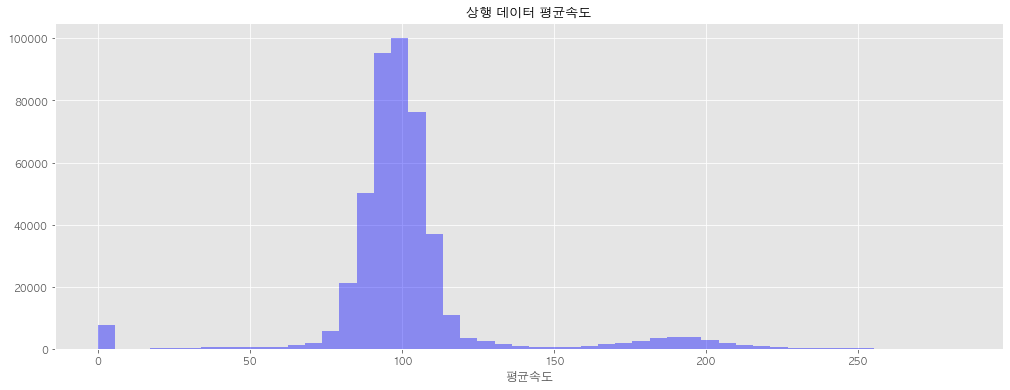

In [76]:
# 상행 데이터 평균속도의 분포 확인
plt.figure(figsize = (17, 6))

sns.distplot(busan_total['평균속도'], kde = False, color = 'b')
plt.title('상행 데이터 평균속도', fontsize = 13)
plt.show()

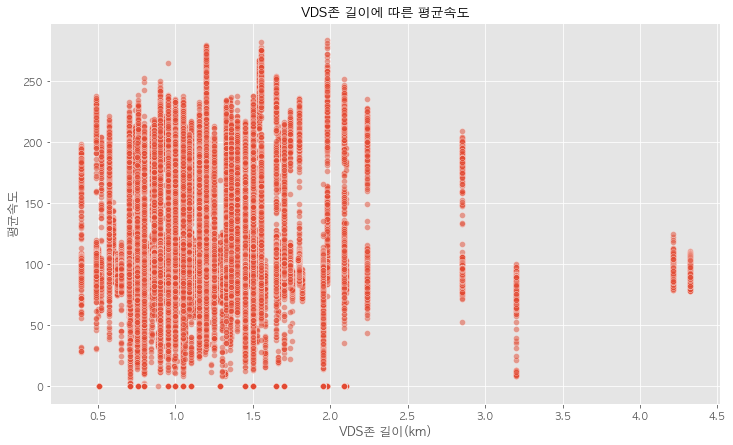

In [78]:
# VDS존 길이에 따른 평균속도 확인
plt.figure(figsize = (12, 7))

sns.scatterplot(x = 'VDS존 길이(km)', y = '평균속도', data = busan_total, alpha = 0.5)
plt.title('VDS존 길이에 따른 평균속도', fontsize = 13)
plt.show()

- VDS존 길이에 따라 평균속도에는 큰 차이가 없는 것으로 보인다.

- 그렇다면, VDS존 길이 변수를 구간화하여도 차이가 없을까?

In [79]:
# 'VDS Band' 변수 생성
busan_total['VDS Band'] = pd.cut(busan_total['VDS존 길이(km)'], 6)
busan_total['VDS Band'].value_counts()

(0.386, 1.045]    236486
(1.045, 1.7]      189373
(1.7, 2.355]       17473
(3.665, 4.32]       2686
(2.355, 3.01]       1344
(3.01, 3.665]       1344
Name: VDS Band, dtype: int64

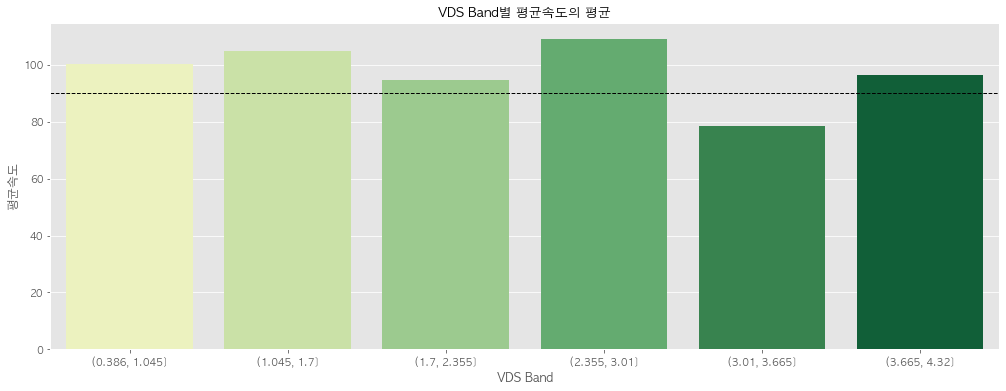

In [81]:
# 'VDS Band' 변수에 따른 평균속도의 평균 확인
plot_data = busan_total.pivot_table(index = 'VDS Band', values = '평균속도', aggfunc = 'mean')

plt.figure(figsize = (17, 6))

sns.barplot(x = plot_data.index, y = '평균속도', data = plot_data, palette = 'YlGn')
plt.axhline(y = 90, linewidth = 1, color = 'black', linestyle = '--')
plt.title('VDS Band별 평균속도의 평균', fontsize = 13)
plt.show()

- VDS존 길이를 구간화 해서 살펴보았더니, 길이가 **3Km ~ 3.7Km** 구간일 때 평균속도가 가장 낮음을 확인할 수 있다.

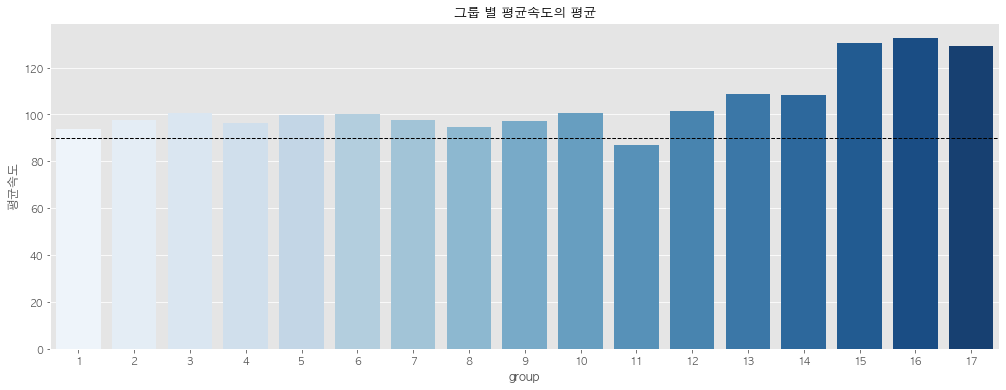

In [83]:
# 그룹별 평균속도의 평균 확인
plot_data = busan_total.pivot_table(index = 'group', values = '평균속도', aggfunc = 'mean')

plt.figure(figsize = (17, 6))

sns.barplot(x = plot_data.index, y = '평균속도', data = plot_data, palette = 'Blues')
plt.axhline(y = 90, linewidth = 1, color = 'black', linestyle = '--')
plt.title('그룹 별 평균속도의 평균', fontsize = 13)
plt.show()

- **90**을 평균속도의 기준으로 두었을 때, **그룹 11**을 제외하고는 모두 다 높음을 확인할 수 있다.

- 그룹 15, 16, 17 이 3개의 그룹 평균속도가 다른 그룹에 비해 높음을 확인할 수 있는데, 왜 그러한 결과를 나타내는지 살펴볼 필요가 있다.

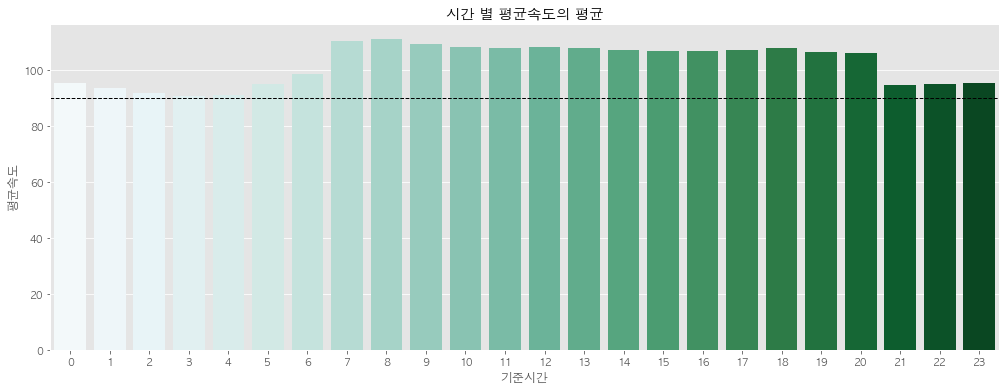

In [84]:
# 시간별 평균속도의 평균 확인
plot_data = busan_total.pivot_table(index = '기준시간', values = '평균속도', aggfunc = 'mean')

plt.figure(figsize = (17, 6))

sns.barplot(x = plot_data.index, y = '평균속도', data = plot_data, palette = 'BuGn')
plt.axhline(y = 90, linewidth = 1, color = 'black', linestyle = '--')
plt.title('시간 별 평균속도의 평균')
plt.show()

- 출퇴근 시간대에 평균속도가 낮을 것이라고 예상했으나, 전체 데이터로 보았을 때는 큰 차이가 없다.

- 오히려 늦은 저녁(21시 ~ 23시)과 새벽 시간대에 평균속도가 낮음을 볼 수 있는데, 해당 부분도 왜 이러한 결과를 나타내는지 살펴볼 필요가 있다.

In [85]:
# 요일별 데이터 분류
mon_busan_total = busan_total[busan_total['요일명'] == '월요일']
print('월요일 데이터 개수 :', len(mon_busan_total))

tue_busan_total = busan_total[busan_total['요일명'] == '화요일']
print('화요일 데이터 개수 :', len(tue_busan_total))

wed_busan_total = busan_total[busan_total['요일명'] == '수요일']
print('수요일 데이터 개수 :', len(wed_busan_total))

thu_busan_total = busan_total[busan_total['요일명'] == '목요일']
print('목요일 데이터 개수 :', len(thu_busan_total))

fri_busan_total = busan_total[busan_total['요일명'] == '금요일']
print('금요일 데이터 개수 :', len(fri_busan_total))

sat_busan_total = busan_total[busan_total['요일명'] == '토요일']
print('토요일 데이터 개수 :', len(sat_busan_total))

sun_busan_total = busan_total[busan_total['요일명'] == '일요일']
print('일요일 데이터 개수 :', len(sun_busan_total))
print('-'*30)

# 요일별 VDS_ID 개수
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

for day in days:
    data = busan_total[busan_total['요일명'] == day]
    print(day, 'VDS_ID의 개수 :', len(set(data['VDS_ID'])))
    print(day, '데이터 개수 :', len(data))
    print(day, 'group의 개수 :', len(data['group'].unique()), '\n')

월요일 데이터 개수 : 64056
화요일 데이터 개수 : 63994
수요일 데이터 개수 : 63961
목요일 데이터 개수 : 64387
금요일 데이터 개수 : 64431
토요일 데이터 개수 : 63977
일요일 데이터 개수 : 63900
------------------------------
월요일 VDS_ID의 개수 : 340
월요일 데이터 개수 : 64056
월요일 group의 개수 : 17 

화요일 VDS_ID의 개수 : 339
화요일 데이터 개수 : 63994
화요일 group의 개수 : 17 

수요일 VDS_ID의 개수 : 339
수요일 데이터 개수 : 63961
수요일 group의 개수 : 17 

목요일 VDS_ID의 개수 : 343
목요일 데이터 개수 : 64387
목요일 group의 개수 : 17 

금요일 VDS_ID의 개수 : 343
금요일 데이터 개수 : 64431
금요일 group의 개수 : 17 

토요일 VDS_ID의 개수 : 341
토요일 데이터 개수 : 63977
토요일 group의 개수 : 17 

일요일 VDS_ID의 개수 : 340
일요일 데이터 개수 : 63900
일요일 group의 개수 : 17 



## 4.2 하행 데이터 EDA

In [87]:
# 하행 데이터 일부 확인
display(seoul_total.head(3))

,VDS_ID,기점종점방향구분코드,WGS84_X좌표,WGS84_Y좌표,VDS존_시작이정(km),VDS존_종료이정(km),VDS존 길이(km),지점이정(km),콘존ID,기준시간,기준시,기준일,Month,Day,요일명,노드명,도로이정,교통량,평균속도,holiday,group
508032,0010VDS00100,S,129.101614,35.256977,2.02,0.2,1.82,1.4,0010CZS010,0,0,2020-08-26,8,26,수요일,영락IC,2.02,106,95.13,0,35
508033,0010VDS00100,S,129.101614,35.256977,2.02,0.2,1.82,1.4,0010CZS010,1,45,2020-08-26,8,26,수요일,영락IC,2.02,38,84.74,0,35
508034,0010VDS00100,S,129.101614,35.256977,2.02,0.2,1.82,1.4,0010CZS010,3,15,2020-08-26,8,26,수요일,영락IC,2.02,40,87.84,0,35


In [88]:
print('하행 데이터 VDS_ID 개수 :', len(set(seoul_total['VDS_ID'])))

하행 데이터 VDS_ID 개수 : 345


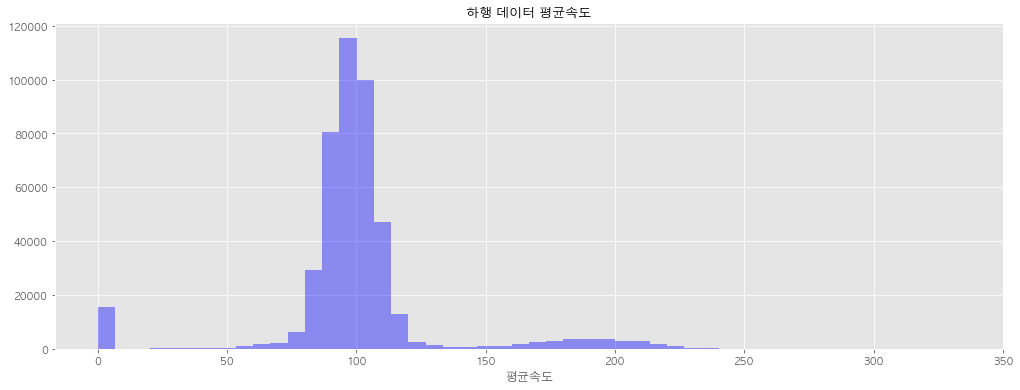

In [91]:
# 하행 데이터 평균속도의 분포 확인
plt.figure(figsize = (17, 6))

sns.distplot(seoul_total['평균속도'], kde = False, color = 'b')
plt.title('하행 데이터 평균속도', fontsize = 13)
plt.show()

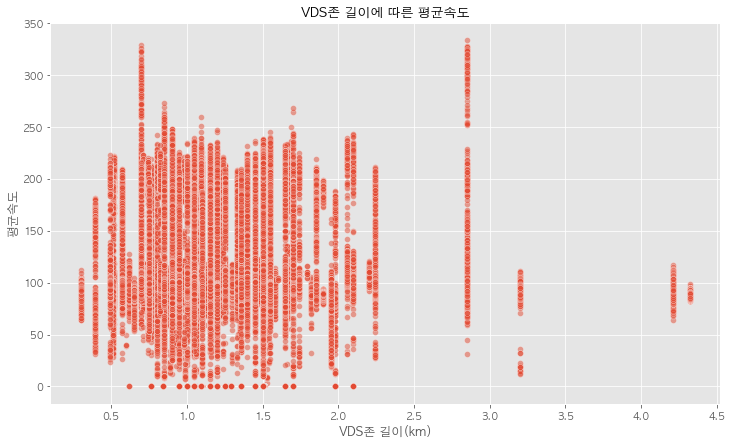

In [92]:
# VDS존 길이에 따른 평균속도 확인
plt.figure(figsize = (12, 7))

sns.scatterplot(x = 'VDS존 길이(km)', y = '평균속도', data = seoul_total, alpha = 0.5)
plt.title('VDS존 길이에 따른 평균속도', fontsize = 13)
plt.show()

In [93]:
# 'VDS Band' 변수 생성
seoul_total['VDS Band'] = pd.cut(seoul_total['VDS존 길이(km)'], 6)
seoul_total['VDS Band'].value_counts()

(0.97, 1.64]     244138
(0.296, 0.97]    173813
(1.64, 2.31]      25132
(3.65, 4.32]       2686
(2.31, 2.98]       1344
(2.98, 3.65]       1344
Name: VDS Band, dtype: int64

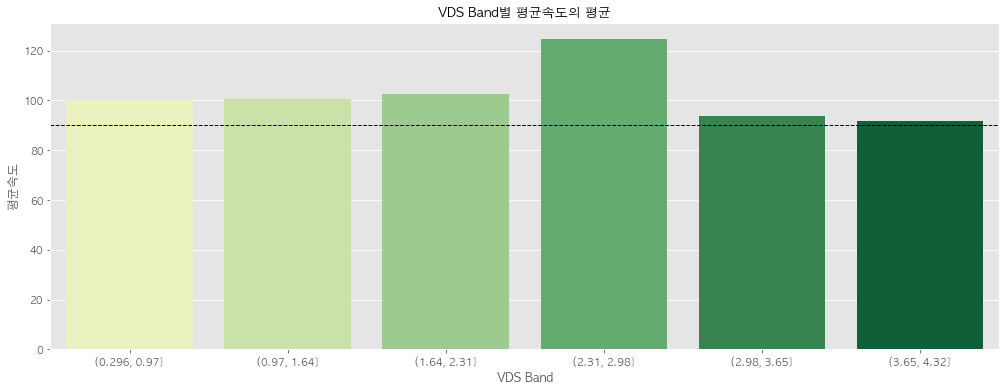

In [95]:
# 'VDS Band' 변수에 따른 평균속도의 평균 확인
plot_data = seoul_total.pivot_table(index = 'VDS Band', values = '평균속도', aggfunc = 'mean')

plt.figure(figsize = (17, 6))

sns.barplot(x = plot_data.index, y = '평균속도', data = plot_data, palette = 'YlGn')
plt.axhline(y = 90, linewidth = 1, color = 'black', linestyle = '--')
plt.title('VDS Band별 평균속도의 평균', fontsize = 13)
plt.show()

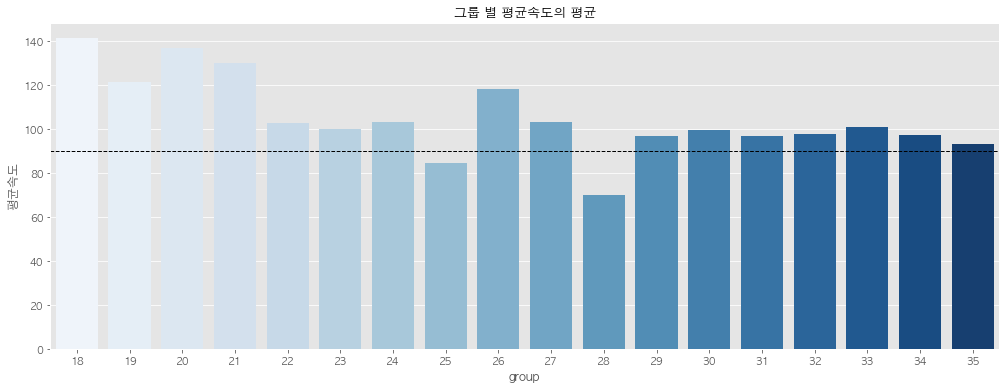

In [96]:
# 그룹별 평균속도의 평균 확인
plot_data = seoul_total.pivot_table(index = 'group', values = '평균속도', aggfunc = 'mean')

plt.figure(figsize = (17, 6))

sns.barplot(x = plot_data.index, y = '평균속도', data = plot_data, palette = 'Blues')
plt.axhline(y = 90, linewidth = 1, color = 'black', linestyle = '--')
plt.title('그룹 별 평균속도의 평균', fontsize = 13)
plt.show()

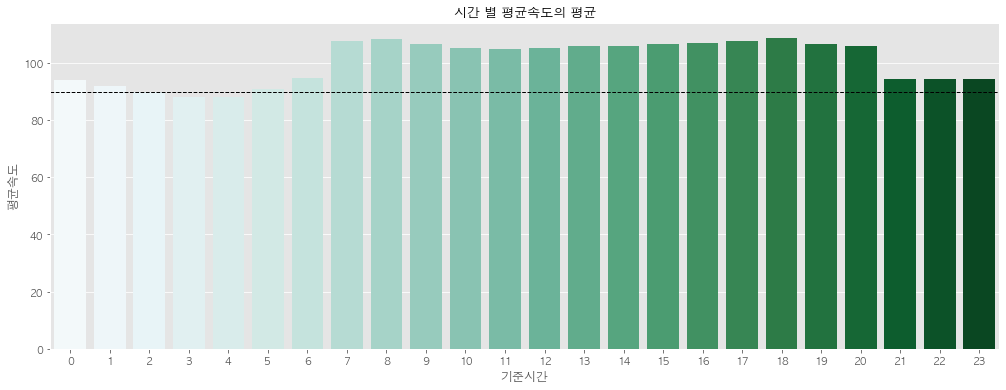

In [97]:
# 시간별 평균속도의 평균 확인
plot_data = seoul_total.pivot_table(index = '기준시간', values = '평균속도', aggfunc = 'mean')

plt.figure(figsize = (17, 6))

sns.barplot(x = plot_data.index, y = '평균속도', data = plot_data, palette = 'BuGn')
plt.axhline(y = 90, linewidth = 1, color = 'black', linestyle = '--')
plt.title('시간 별 평균속도의 평균', fontsize = 13)
plt.show()

In [98]:
# 요일별 데이터 분류
mon_seoul_total = seoul_total[seoul_total['요일명'] == '월요일']
print('월요일 데이터 개수 :', len(mon_seoul_total))

tue_seoul_total = seoul_total[seoul_total['요일명'] == '화요일']
print('화요일 데이터 개수 :', len(tue_seoul_total))

wed_seoul_total = seoul_total[seoul_total['요일명'] == '수요일']
print('수요일 데이터 개수 :', len(wed_seoul_total))

thu_seoul_total = seoul_total[seoul_total['요일명'] == '목요일']
print('목요일 데이터 개수 :', len(thu_seoul_total))

fri_seoul_total = seoul_total[seoul_total['요일명'] == '금요일']
print('금요일 데이터 개수 :', len(fri_seoul_total))

sat_seoul_total = seoul_total[seoul_total['요일명'] == '토요일']
print('토요일 데이터 개수 :', len(sat_seoul_total))

sun_seoul_total = seoul_total[seoul_total['요일명'] == '일요일']
print('일요일 데이터 개수 :', len(sun_seoul_total))
print('-'*30)

# 요일별 VDS_ID 개수
days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

for day in days:
    data = seoul_total[seoul_total['요일명'] == day]
    print(day, 'VDS_ID의 개수 :', len(set(data['VDS_ID'])))
    print(day, '데이터 개수 :', len(data))
    print(day, 'group의 개수 :', len(data['group'].unique()), '\n')

월요일 데이터 개수 : 63959
화요일 데이터 개수 : 63804
수요일 데이터 개수 : 64024
목요일 데이터 개수 : 64400
금요일 데이터 개수 : 64226
토요일 데이터 개수 : 64107
일요일 데이터 개수 : 63937
------------------------------
월요일 VDS_ID의 개수 : 339
월요일 데이터 개수 : 63959
월요일 group의 개수 : 18 

화요일 VDS_ID의 개수 : 338
화요일 데이터 개수 : 63804
화요일 group의 개수 : 18 

수요일 VDS_ID의 개수 : 340
수요일 데이터 개수 : 64024
수요일 group의 개수 : 18 

목요일 VDS_ID의 개수 : 343
목요일 데이터 개수 : 64400
목요일 group의 개수 : 18 

금요일 VDS_ID의 개수 : 342
금요일 데이터 개수 : 64226
금요일 group의 개수 : 18 

토요일 VDS_ID의 개수 : 342
토요일 데이터 개수 : 64107
토요일 group의 개수 : 18 

일요일 VDS_ID의 개수 : 341
일요일 데이터 개수 : 63937
일요일 group의 개수 : 18 

